***
# Problem 3: Explicit, implicit and CN time stepping schemes
Given problem for which the solution has been attempted. 
$$ f=2te^{-t}-u$$
$$ u(t=0)=1$$
$$ 0\leq t \leq 2$$
**_Note:_** *this is my third attempt of the same problem as it kept changing every now and then, doing one more time was not possible*

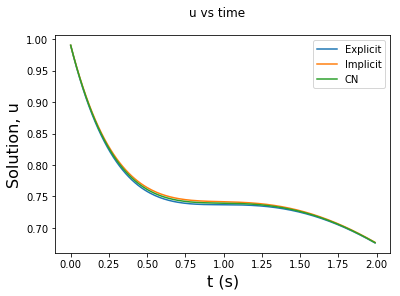

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
# explicit scheme
u=[]
t=0.01
for i in range(200):
    if i==0: # case t=0
        u.append(1-0.01)
    else:
        u.append(u[i-1]+(0.01)*(2*t*np.exp(-t)-u[i-1]))
    t=t+0.01
# implicit scheme
ub=[]
t=0.01
for i in range(200):
    if i==0: # case t=0
        ub.append((1+ (0.01)*2*(0.01)*np.exp(-0.01))/(1+0.01))
    else:
        ub.append((ub[i-1]+(0.01)*2*(t+0.01)*np.exp(-(t+0.01)))/(1+0.01))
    t=t+0.01
# CN scheme
uc=[]
t=0.01
for i in range(200):
    if i==0:
        uc.append((1+(0.5)*(0.01)*(2*t*np.exp(-t)-1+2*(t+0.01)*np.exp(-(t+0.01))))/(1+0.005))
    else:
        uc.append((uc[i-1]+(0.5)*(0.01)*(2*t*np.exp(-t)-uc[i-1]+2*(t+0.01)*np.exp(-(t+0.01))))/(1+0.005))
    t=t+0.01
# CN scheme end

t = np.arange(0, 2, 0.01)
plt.plot(t, u, label="Explicit")
plt.plot(t, ub, label="Implicit")
plt.plot(t, uc, label="CN")
plt.legend()
plt.xlabel('t (s)', fontsize=16)
plt.ylabel('Solution, u', fontsize=16)
plt.suptitle('u vs time')
plt.show()

# Problem 4: 1-D Heat loss through circular fin

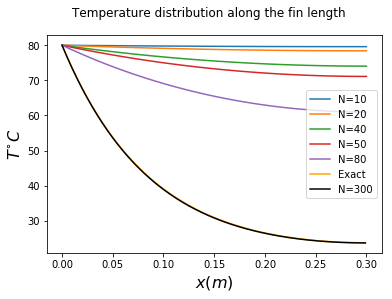

In [4]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from array import *
from scipy.sparse import *

def TDMA(T,d, n):
	a=[]
	b=[]
	c=[]
	cs=[]
	ds=[]
	u=[]

	for i in range(len(T)):
		for j in range(len(T[0])):
			if (j-i)==1:
				c.append(T[i][j])
			if (i-j==1):
				a.append(T[i][j])
			if i==j:
				b.append(T[i][j])
	# acccomodating n nodes
	tb=b[len(b)-1]
	ta=a[len(a)-1]
	a.pop()
	b.pop()
	for i in range(n-4):
		a.append(a[len(a)-1])
		b.append(b[len(b)-1])
		c.append(c[len(c)-1])
		d.append(d[len(d)-1])
	a.append(ta)
	b.append(tb)
	T = diags([b,a,c], [0,-1, 1]).todense()
	#print(T)
	#print("T",len(T))

	for i in range(len(d)):
		u.append(0)

	for i in range(len(c)):
		if i==0:
			cs.append(c[i]/b[i])
		elif i!=0:
			cs.append(c[i]/(b[i]-a[i-1]*cs[i-1]))

	for i in range(len(d)):
		if i==0:
			ds.append(d[i]/b[i])
		elif i!=0:
			ds.append((d[i]-a[i-1]*ds[i-1])/(b[i]-a[i-1]*cs[i-1]))

	for i in range(len(d)-1,-1,-1):
		if i == len(d)-1:
			u[i]=ds[i]
		elif i!= len(d)-1:
			u[i]=ds[i]-cs[i]*u[i+1]
	return(u)

n=299
m=0.3/(n-1)
c=(400/3)*m*m
# Matrix equation AX=B, n is the number of nodes
A = [[1, 0, 0,0,0],[1,-(c+2),1,0,0],[0,1,-(c+2),1,0],[0,0,1,-(c+2),1],[0,0,0,2,-(c+2)]]
B=[80,-c*20,-c*20,-c*20,-c*20]

# NN=[10]
NN=[10,20,40,50,80]
for N in NN:
	l=np.arange(0,0.30005,0.3/N)
	# print(len(TDMA(list(A),list(B),N-1)))
	# print(TDMA(list(A),list(B),N-1))
	# print(l)
	plt.plot(l, TDMA(list(A),list(B),N),label="N="+str(N))

x = np.arange(0, 0.3, 0.001)
T_exact = 0.058728*np.exp((20*x)/(np.sqrt(3)))+59.9412719*np.exp((-20*x)/(np.sqrt(3)))+20

plt.plot(x, T_exact, label="Exact",color='orange')
plt.plot(x, TDMA(list(A),list(B),int(n)),label="N=300", color='black')
plt.legend()
plt.xlabel(r'$x (m)$', fontsize=16)
plt.ylabel(r'$ T^{\circ}C $', fontsize=16)
plt.suptitle('Temperature distribution along the fin length')
plt.show()

Please note that the exact solution and solution with N = 300 are almost coinciding.